In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import datetime as dt

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

%matplotlib inline
sns.set_style("darkgrid")
sns.set_palette("Set2")


In [4]:
df_generation1 = pd.read_csv(r"C:\Users\soham jadhav\Desktop\solar prediction\Plant_1_Generation_Data.csv")
df_weather1 = pd.read_csv(r"C:\Users\soham jadhav\Desktop\solar prediction\Plant_1_Weather_Sensor_Data.csv")
df_generation2 = pd.read_csv(r"C:\Users\soham jadhav\Desktop\solar prediction\Plant_2_Generation_Data.csv")
df_weather2 = pd.read_csv(r"C:\Users\soham jadhav\Desktop\solar prediction\Plant_2_Weather_Sensor_Data.csv")

In [5]:
df_generation1.head()

,DATE_TIME,PLANT_ID,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
0,15-05-2020 00:00,4135001,1BY6WEcLGh8j5v7,0.0,0.0,0.0,6259559.0
1,15-05-2020 00:00,4135001,1IF53ai7Xc0U56Y,0.0,0.0,0.0,6183645.0
2,15-05-2020 00:00,4135001,3PZuoBAID5Wc2HD,0.0,0.0,0.0,6987759.0
3,15-05-2020 00:00,4135001,7JYdWkrLSPkdwr4,0.0,0.0,0.0,7602960.0
4,15-05-2020 00:00,4135001,McdE0feGgRqW7Ca,0.0,0.0,0.0,7158964.0


In [6]:
df_generation1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68778 entries, 0 to 68777
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   DATE_TIME    68778 non-null  object 
 1   PLANT_ID     68778 non-null  int64  
 2   SOURCE_KEY   68778 non-null  object 
 3   DC_POWER     68778 non-null  float64
 4   AC_POWER     68778 non-null  float64
 5   DAILY_YIELD  68778 non-null  float64
 6   TOTAL_YIELD  68778 non-null  float64
dtypes: float64(4), int64(1), object(2)
memory usage: 3.7+ MB


In [7]:
df_generation1.describe().T

,count,mean,std,min,25%,50%,75%,max
PLANT_ID,68778.0,4.135001e+06,0.000000,4135001.0,4.135001e+06,4.135001e+06,4.135001e+06,4135001.000
DC_POWER,68778.0,3.147426e+03,4036.457169,0.0,0.000000e+00,4.290000e+02,6.366964e+03,14471.125
AC_POWER,68778.0,3.078028e+02,394.396439,0.0,0.000000e+00,4.149375e+01,6.236187e+02,1410.950
DAILY_YIELD,68778.0,3.295969e+03,3145.178309,0.0,0.000000e+00,2.658714e+03,6.274000e+03,9163.000
TOTAL_YIELD,68778.0,6.978712e+06,416271.982856,6183645.0,6.512003e+06,7.146685e+06,7.268706e+06,7846821.000


In [8]:
df_generation1.columns

Index(['DATE_TIME', 'PLANT_ID', 'SOURCE_KEY', 'DC_POWER', 'AC_POWER',
       'DAILY_YIELD', 'TOTAL_YIELD'],
      dtype='object')

In [9]:
df_generation1.head(), df_weather1.head(), df_generation2.head(), df_weather2.head()

(          DATE_TIME  PLANT_ID       SOURCE_KEY  DC_POWER  AC_POWER  \
 0  15-05-2020 00:00   4135001  1BY6WEcLGh8j5v7       0.0       0.0   
 1  15-05-2020 00:00   4135001  1IF53ai7Xc0U56Y       0.0       0.0   
 2  15-05-2020 00:00   4135001  3PZuoBAID5Wc2HD       0.0       0.0   
 3  15-05-2020 00:00   4135001  7JYdWkrLSPkdwr4       0.0       0.0   
 4  15-05-2020 00:00   4135001  McdE0feGgRqW7Ca       0.0       0.0   
 
    DAILY_YIELD  TOTAL_YIELD  
 0          0.0    6259559.0  
 1          0.0    6183645.0  
 2          0.0    6987759.0  
 3          0.0    7602960.0  
 4          0.0    7158964.0  ,
              DATE_TIME  PLANT_ID       SOURCE_KEY  AMBIENT_TEMPERATURE  \
 0  2020-05-15 00:00:00   4135001  HmiyD2TTLFNqkNe            25.184316   
 1  2020-05-15 00:15:00   4135001  HmiyD2TTLFNqkNe            25.084589   
 2  2020-05-15 00:30:00   4135001  HmiyD2TTLFNqkNe            24.935753   
 3  2020-05-15 00:45:00   4135001  HmiyD2TTLFNqkNe            24.846130   
 4  2020-0

In [10]:
for df in [df_generation1, df_weather1, df_generation2, df_weather2]:
    df["DATE_TIME"] = pd.to_datetime(df["DATE_TIME"], errors="coerce")

# Checking for missing values
missing_values = {
    "Plant_1_Generation": df_generation1.isnull().sum(),
    "Plant_1_Weather": df_weather1.isnull().sum(),
    "Plant_2_Generation": df_generation2.isnull().sum(),
    "Plant_2_Weather": df_weather2.isnull().sum(),
}

# Drop rows with missing DATE_TIME values (if any)
for df in [df_generation1, df_weather1, df_generation2, df_weather2]:
    df.dropna(subset=["DATE_TIME"], inplace=True)

# Merging datasets for integration
plant_1_merged = pd.merge(df_generation1, df_weather1, on=["DATE_TIME", "PLANT_ID"], how="inner")
plant_2_merged = pd.merge(df_generation2, df_weather2, on=["DATE_TIME", "PLANT_ID"], how="inner")

# Checking merged data
plant_1_merged.head(), plant_2_merged.head(), missing_values

C:\Users\soham jadhav\AppData\Local\Temp\ipykernel_31496\1230257681.py:2: UserWarning: Parsing dates in %d-%m-%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df["DATE_TIME"] = pd.to_datetime(df["DATE_TIME"], errors="coerce")


(   DATE_TIME  PLANT_ID     SOURCE_KEY_x  DC_POWER  AC_POWER  DAILY_YIELD  \
 0 2020-05-15   4135001  1BY6WEcLGh8j5v7       0.0       0.0          0.0   
 1 2020-05-15   4135001  1IF53ai7Xc0U56Y       0.0       0.0          0.0   
 2 2020-05-15   4135001  3PZuoBAID5Wc2HD       0.0       0.0          0.0   
 3 2020-05-15   4135001  7JYdWkrLSPkdwr4       0.0       0.0          0.0   
 4 2020-05-15   4135001  McdE0feGgRqW7Ca       0.0       0.0          0.0   
 
    TOTAL_YIELD     SOURCE_KEY_y  AMBIENT_TEMPERATURE  MODULE_TEMPERATURE  \
 0    6259559.0  HmiyD2TTLFNqkNe            25.184316           22.857507   
 1    6183645.0  HmiyD2TTLFNqkNe            25.184316           22.857507   
 2    6987759.0  HmiyD2TTLFNqkNe            25.184316           22.857507   
 3    7602960.0  HmiyD2TTLFNqkNe            25.184316           22.857507   
 4    7158964.0  HmiyD2TTLFNqkNe            25.184316           22.857507   
 
    IRRADIATION  
 0          0.0  
 1          0.0  
 2          0.0  


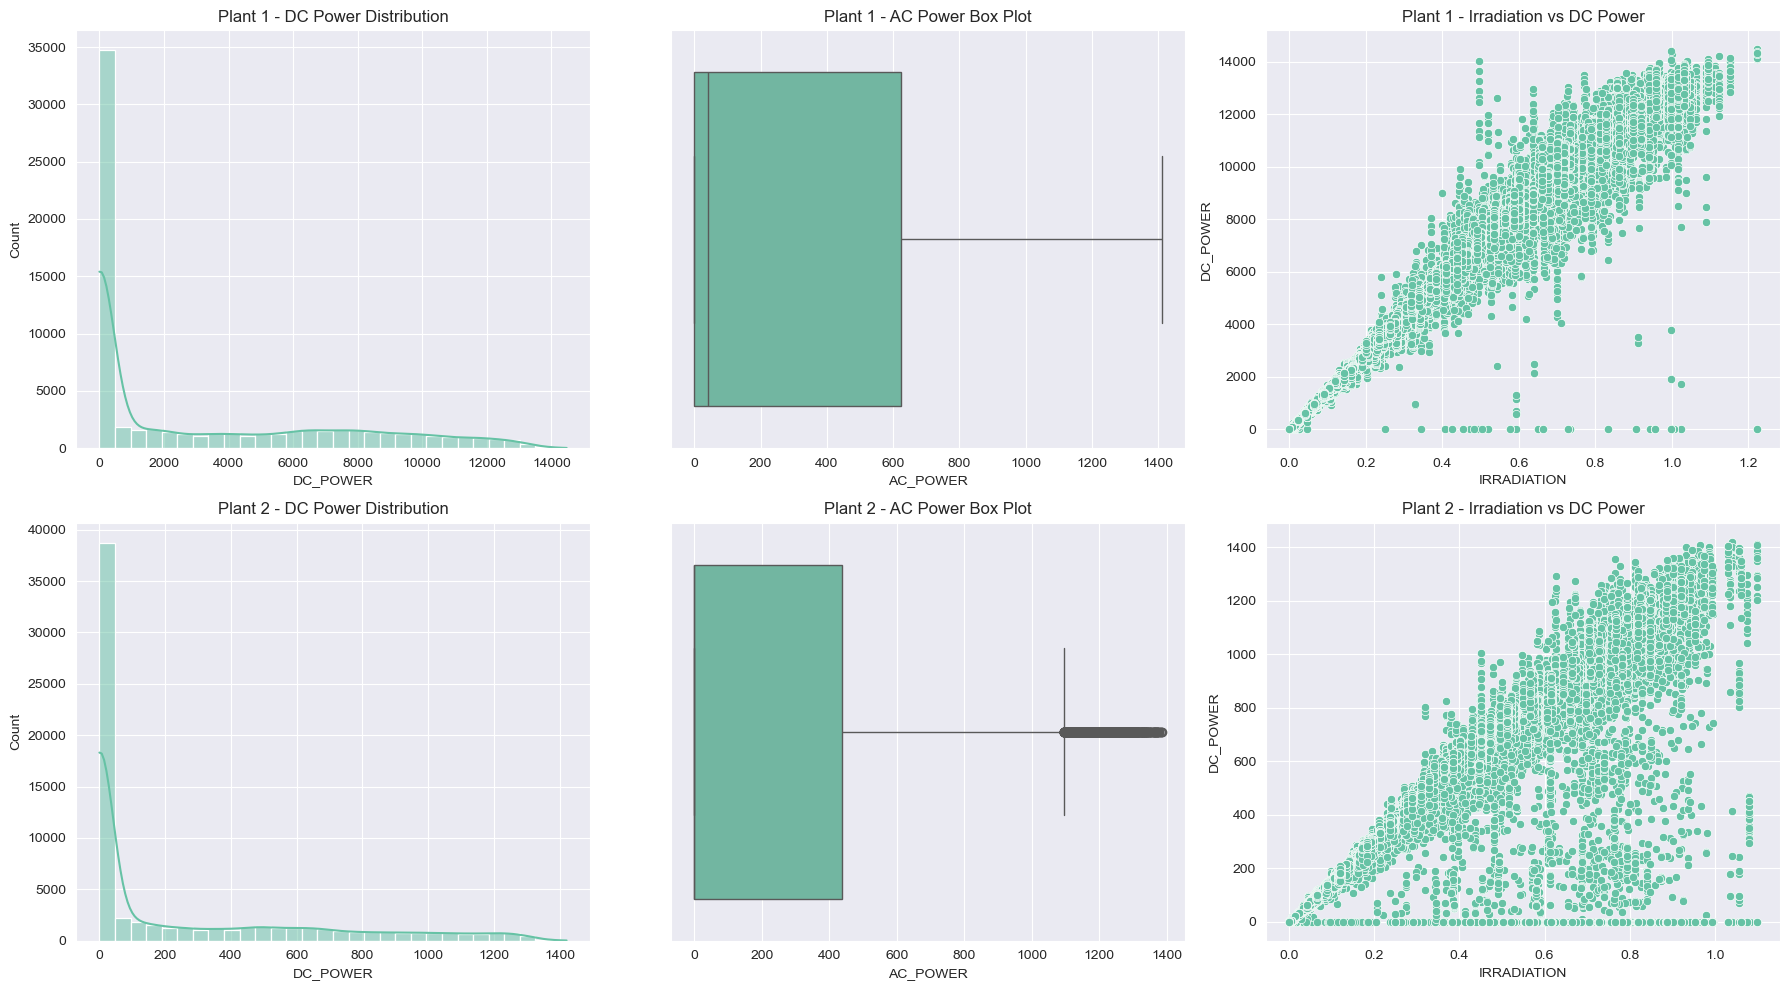

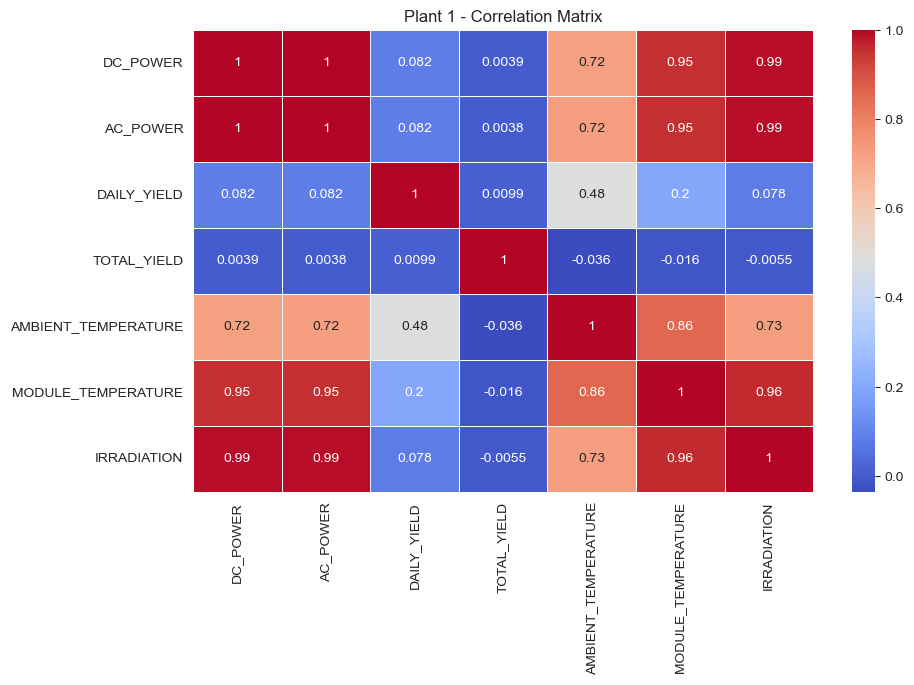

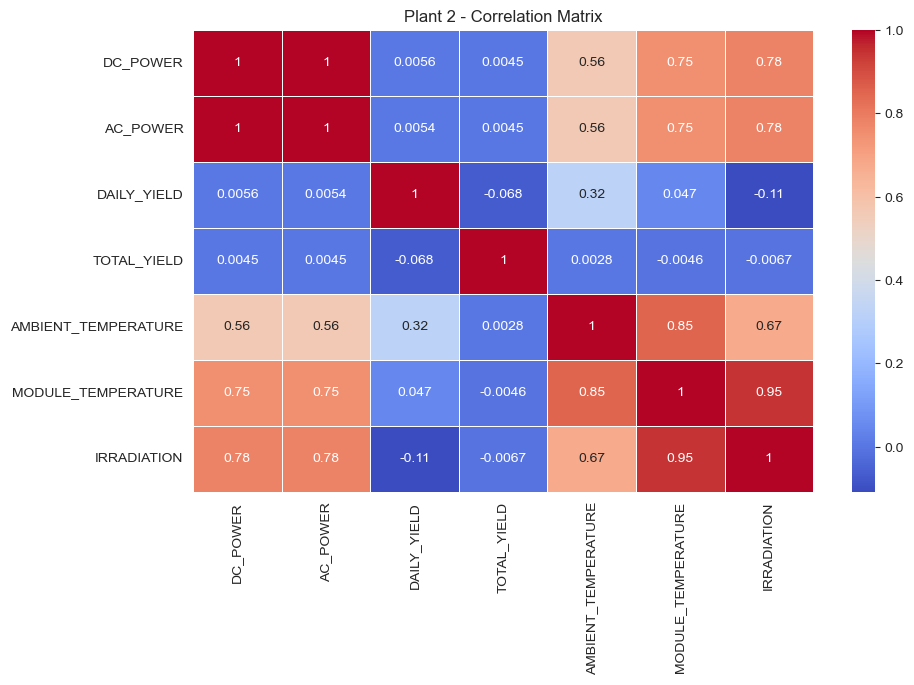

In [11]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

# Handling missing values (already checked, but re-confirming)
missing_values_plant_1 = plant_1_merged.isnull().sum()
missing_values_plant_2 = plant_2_merged.isnull().sum()

# Checking for duplicates
duplicates_plant_1 = plant_1_merged.duplicated().sum()
duplicates_plant_2 = plant_2_merged.duplicated().sum()

# Removing duplicates if any
plant_1_merged.drop_duplicates(inplace=True)
plant_2_merged.drop_duplicates(inplace=True)

# Detecting outliers using IQR method
def detect_outliers_iqr(df, columns):
    outliers = {}
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers[col] = df[(df[col] < lower_bound) | (df[col] > upper_bound)][col].count()
    return outliers

# Numerical columns to check for outliers
numerical_columns = ["DC_POWER", "AC_POWER", "DAILY_YIELD", "TOTAL_YIELD",
                     "AMBIENT_TEMPERATURE", "MODULE_TEMPERATURE", "IRRADIATION"]

outliers_plant_1 = detect_outliers_iqr(plant_1_merged, numerical_columns)
outliers_plant_2 = detect_outliers_iqr(plant_2_merged, numerical_columns)

# Computing summary statistics
summary_stats_plant_1 = plant_1_merged[numerical_columns].describe()
summary_stats_plant_2 = plant_2_merged[numerical_columns].describe()

# Data Visualization - Histograms, Box Plots, Correlation Matrix
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
sns.histplot(plant_1_merged["DC_POWER"], bins=30, kde=True, ax=axes[0, 0]).set(title="Plant 1 - DC Power Distribution")
sns.histplot(plant_2_merged["DC_POWER"], bins=30, kde=True, ax=axes[1, 0]).set(title="Plant 2 - DC Power Distribution")
sns.boxplot(x=plant_1_merged["AC_POWER"], ax=axes[0, 1]).set(title="Plant 1 - AC Power Box Plot")
sns.boxplot(x=plant_2_merged["AC_POWER"], ax=axes[1, 1]).set(title="Plant 2 - AC Power Box Plot")
sns.scatterplot(x=plant_1_merged["IRRADIATION"], y=plant_1_merged["DC_POWER"], ax=axes[0, 2]).set(title="Plant 1 - Irradiation vs DC Power")
sns.scatterplot(x=plant_2_merged["IRRADIATION"], y=plant_2_merged["DC_POWER"], ax=axes[1, 2]).set(title="Plant 2 - Irradiation vs DC Power")
plt.tight_layout()
plt.show()

# Correlation matrix heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(plant_1_merged[numerical_columns].corr(), annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Plant 1 - Correlation Matrix")
plt.show()

plt.figure(figsize=(10, 6))
sns.heatmap(plant_2_merged[numerical_columns].corr(), annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Plant 2 - Correlation Matrix")
plt.show()

In [12]:
# Convert DATE_TIME to datetime for df_generation1 (format: day-month-year hour:minute)
df_generation1['DATE_TIME'] = pd.to_datetime(df_generation1['DATE_TIME'], format='%d-%m-%Y %H:%M')

# Convert DATE_TIME to datetime for df_generation2 (format: year-month-day hour:minute:second)
df_generation2['DATE_TIME'] = pd.to_datetime(df_generation2['DATE_TIME'], format='%Y-%m-%d %H:%M:%S')

# Convert DATE_TIME to datetime for df_weather1 (format: year-month-day hour:minute:second)
df_weather1['DATE_TIME'] = pd.to_datetime(df_weather1['DATE_TIME'], format='%Y-%m-%d %H:%M:%S')

# Convert DATE_TIME to datetime for df_weather2 (format: year-month-day hour:minute:second)
df_weather2['DATE_TIME'] = pd.to_datetime(df_weather2['DATE_TIME'], format='%Y-%m-%d %H:%M:%S')

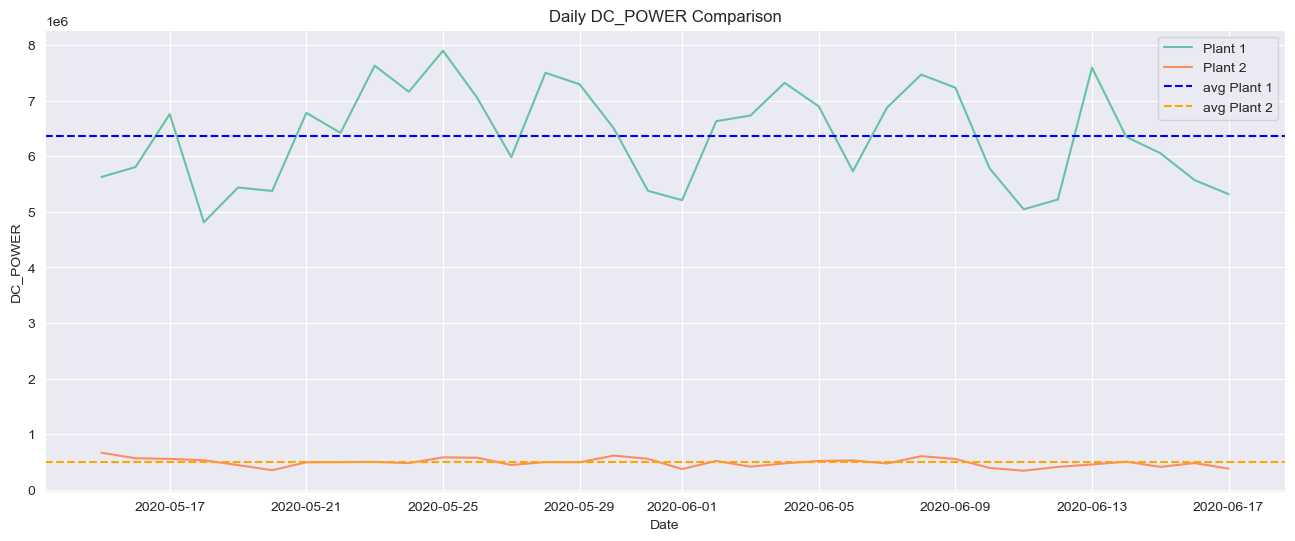

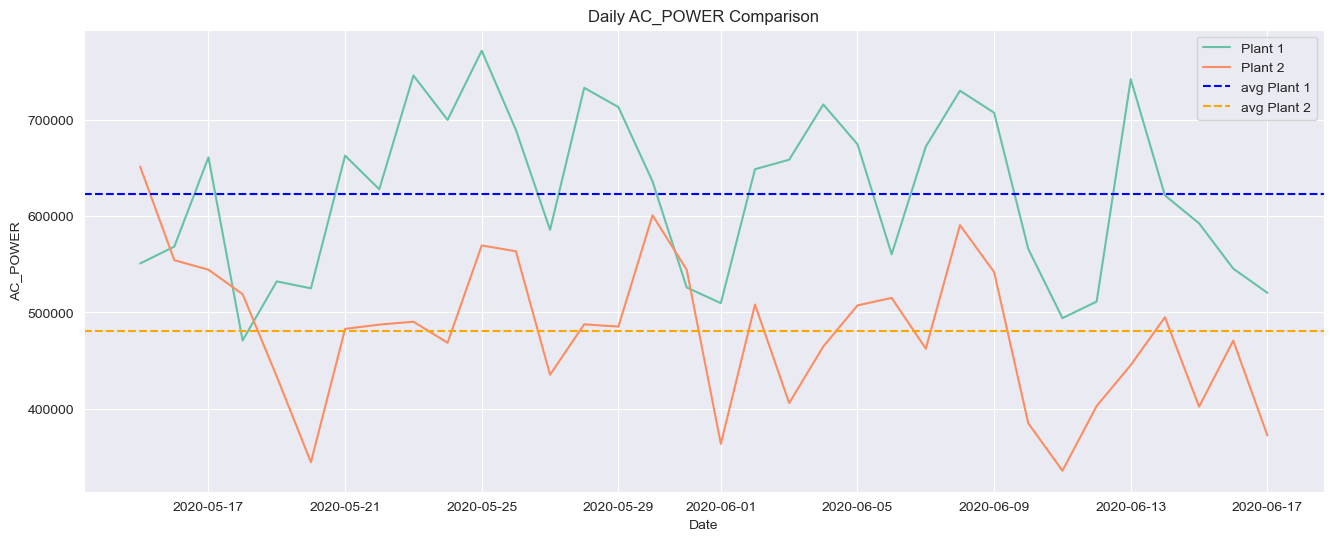

In [13]:
def groupDailyPower(df_generation):
    # Extract date from DATE_TIME and group by date
    df_generation['DATE'] = df_generation['DATE_TIME'].dt.date
    df = df_generation.groupby('DATE').sum(numeric_only=True)  # Sum numeric columns only
    df = df.sort_index()  # Sort by date
    return df

def showDailyPower(plant1, plant2, feature, label1, label2):
    # Group data by daily sums
    df_sort1 = groupDailyPower(plant1)
    df_sort2 = groupDailyPower(plant2)
    
    # Plot the data
    plt.figure(figsize=(16, 6))
    plt.title(f'Daily {feature} Comparison')
    sns.lineplot(x=df_sort1.index, y=feature, data=df_sort1, label=label1)
    sns.lineplot(x=df_sort2.index, y=feature, data=df_sort2, label=label2)
    
    # Add horizontal lines for the mean values
    plt.axhline(y=df_sort1[feature].mean(), color='blue', linestyle='--', label=f'avg {label1}')
    plt.axhline(y=df_sort2[feature].mean(), color='orange', linestyle='--', label=f'avg {label2}')
    
    plt.xlabel('Date')
    plt.ylabel(feature)
    plt.legend()
    plt.show()

# Convert DATE_TIME to datetime (if not already done)
df_generation1['DATE_TIME'] = pd.to_datetime(df_generation1['DATE_TIME'], format='%d-%m-%Y %H:%M')
df_generation2['DATE_TIME'] = pd.to_datetime(df_generation2['DATE_TIME'], format='%Y-%m-%d %H:%M:%S')

# Visualize daily power generation
showDailyPower(df_generation1, df_generation2, 'DC_POWER', 'Plant 1', 'Plant 2')
showDailyPower(df_generation1, df_generation2, 'AC_POWER', 'Plant 1', 'Plant 2')


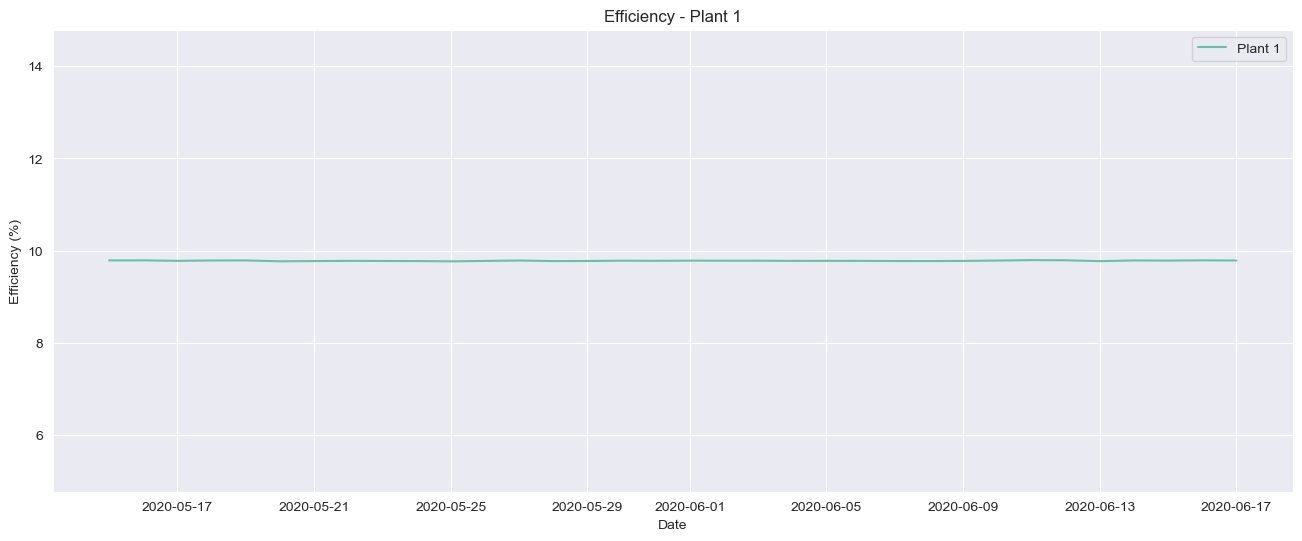

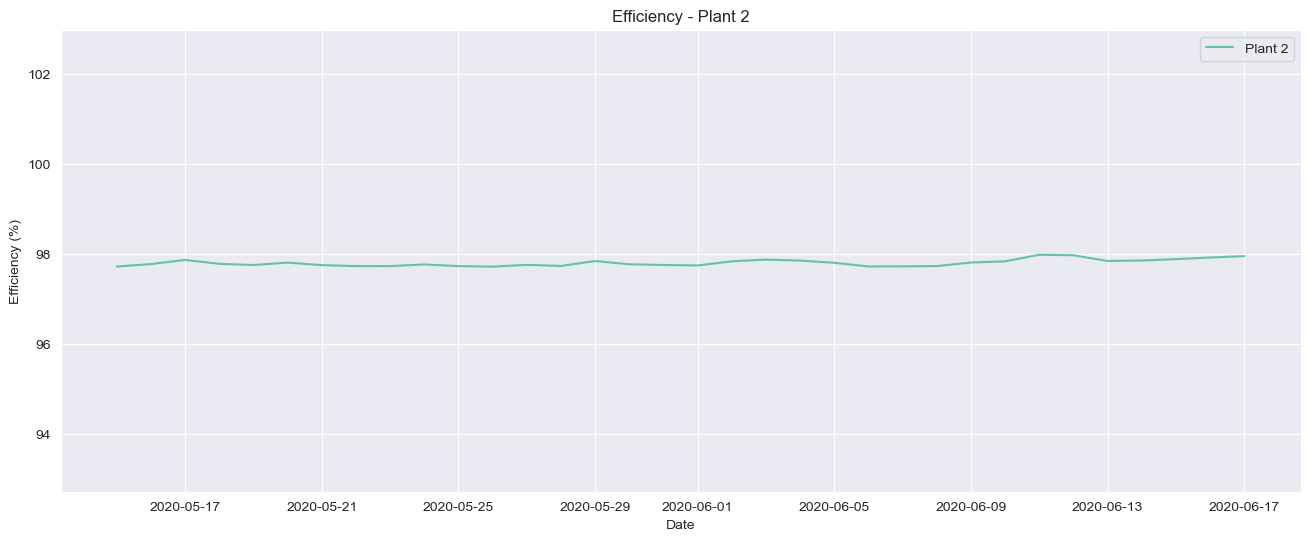

In [14]:
def powerEfficiency(df_generation, label):
    # Extract date from DATE_TIME and group by date
    df_generation['DATE'] = df_generation['DATE_TIME'].dt.date
    df = df_generation.groupby('DATE').sum(numeric_only=True)  # Sum numeric columns only
    df = df.sort_index()  # Sort by date
    
    # Calculate efficiency
    df['efficiency'] = df['AC_POWER'] * 100 / df['DC_POWER']
    
    # Plot the data
    plt.figure(figsize=(16, 6))
    plt.ylim(df['efficiency'].min() - 5, df['efficiency'].max() + 5)  # Set y-axis limits
    plt.title(f'Efficiency - {label}')
    sns.lineplot(x=df.index, y='efficiency', data=df, label=label)
    plt.xlabel('Date')
    plt.ylabel('Efficiency (%)')
    plt.legend()
    plt.show()

# Convert DATE_TIME to datetime (if not already done)
df_generation1['DATE_TIME'] = pd.to_datetime(df_generation1['DATE_TIME'], format='%d-%m-%Y %H:%M')
df_generation2['DATE_TIME'] = pd.to_datetime(df_generation2['DATE_TIME'], format='%Y-%m-%d %H:%M:%S')

# Calculate and plot efficiency for each plant
powerEfficiency(df_generation1, 'Plant 1')
powerEfficiency(df_generation2, 'Plant 2')

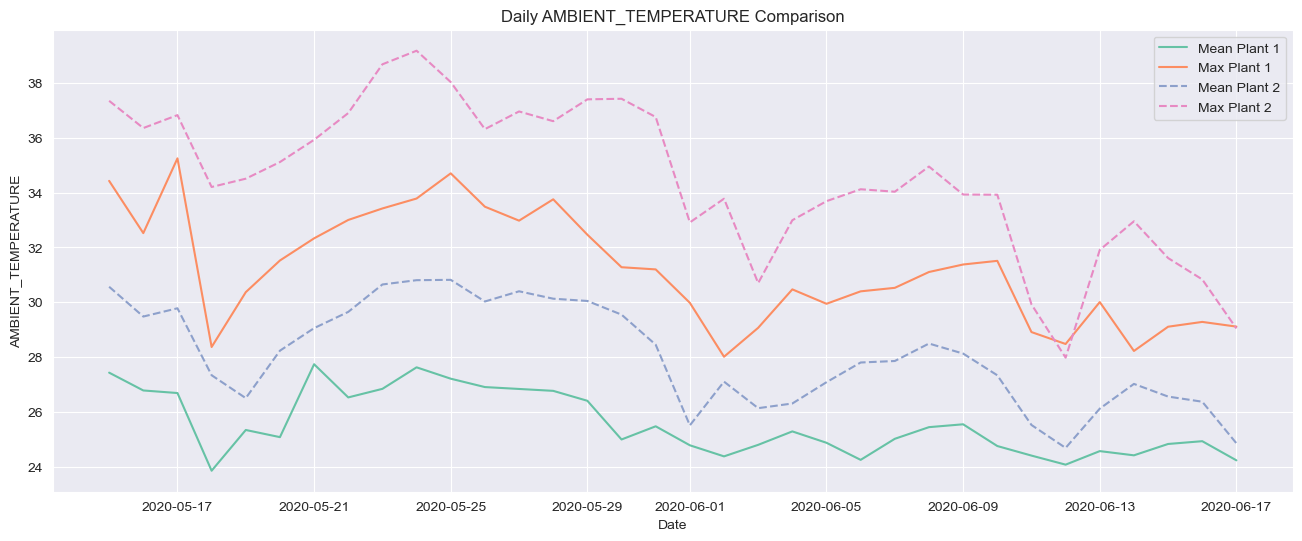

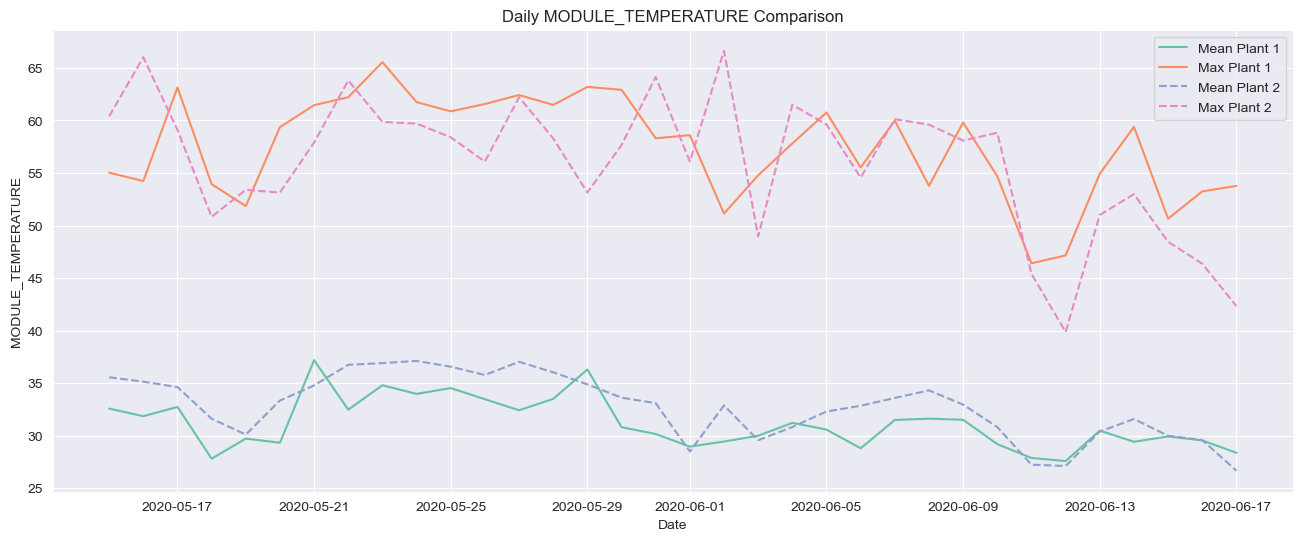

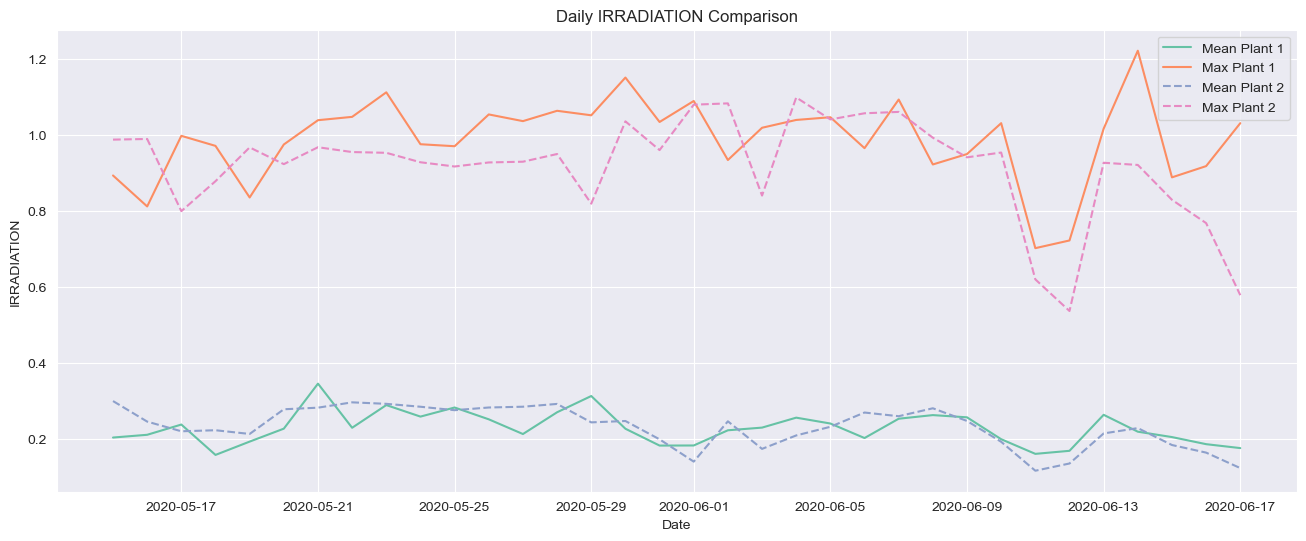

In [15]:
def groupDailyWeather(df_weather, operation):
    # Convert DATE_TIME to datetime if not already
    df_weather['DATE_TIME'] = pd.to_datetime(df_weather['DATE_TIME'])
    
    # Extract date from DATE_TIME
    df_weather['DATE'] = df_weather['DATE_TIME'].dt.date
    
    # Perform the specified aggregation operation
    if operation == 'mean':
        df_sorted = df_weather.groupby('DATE').mean(numeric_only=True)
    elif operation == 'max':
        df_sorted = df_weather.groupby('DATE').max(numeric_only=True)
    else:
        raise ValueError("Invalid operation. Use 'mean' or 'max'.")
    
    df_sorted = df_sorted.sort_index()
    return df_sorted


def showDailyWeather(weather1, weather2, feature, label1, label2):
    df_sort1_mean = groupDailyWeather(weather1, 'mean')
    df_sort1_max = groupDailyWeather(weather1, 'max')
    df_sort2_mean = groupDailyWeather(weather2, 'mean')
    df_sort2_max = groupDailyWeather(weather2, 'max')
    
    plt.figure(figsize=(16, 6))
    plt.title(f'Daily {feature} Comparison')
    
    sns.lineplot(x=df_sort1_mean.index, y=df_sort1_mean[feature], label=f'Mean {label1}')
    sns.lineplot(x=df_sort1_max.index, y=df_sort1_max[feature], label=f'Max {label1}')
    sns.lineplot(x=df_sort2_mean.index, y=df_sort2_mean[feature], label=f'Mean {label2}', linestyle='dashed')
    sns.lineplot(x=df_sort2_max.index, y=df_sort2_max[feature], label=f'Max {label2}', linestyle='dashed')
    
    plt.xlabel('Date')
    plt.ylabel(feature)
    plt.legend()
    plt.show()

# Visualizing weather data
showDailyWeather(df_weather1, df_weather2, 'AMBIENT_TEMPERATURE', 'Plant 1', 'Plant 2')
showDailyWeather(df_weather1, df_weather2, 'MODULE_TEMPERATURE', 'Plant 1', 'Plant 2')
showDailyWeather(df_weather1, df_weather2, 'IRRADIATION', 'Plant 1', 'Plant 2')


In [16]:
from sklearn.naive_bayes import GaussianNB

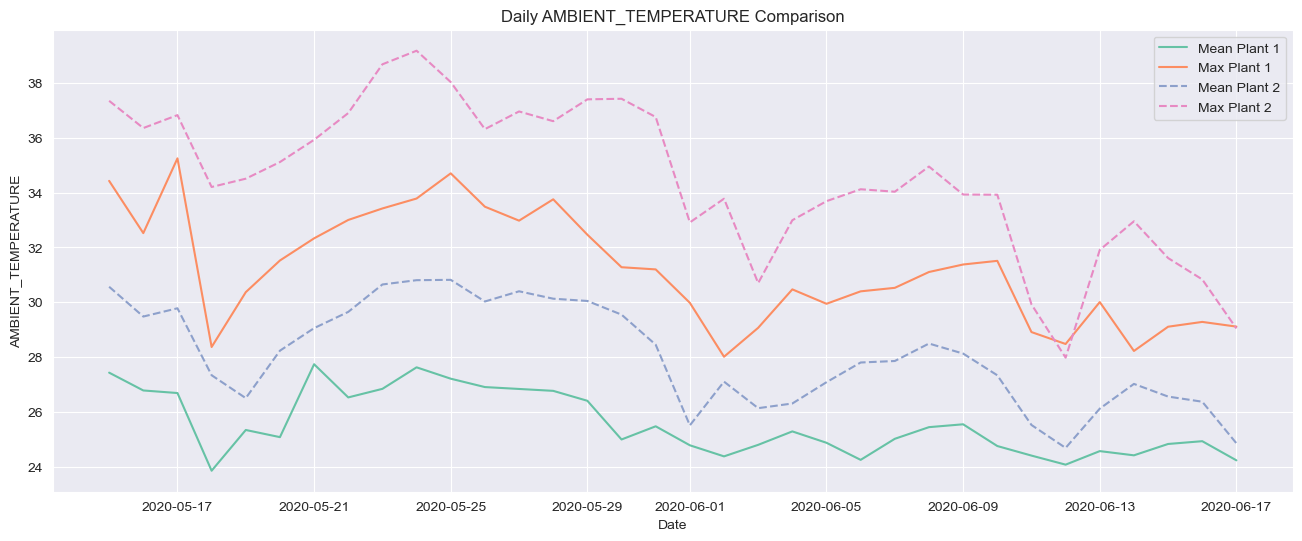

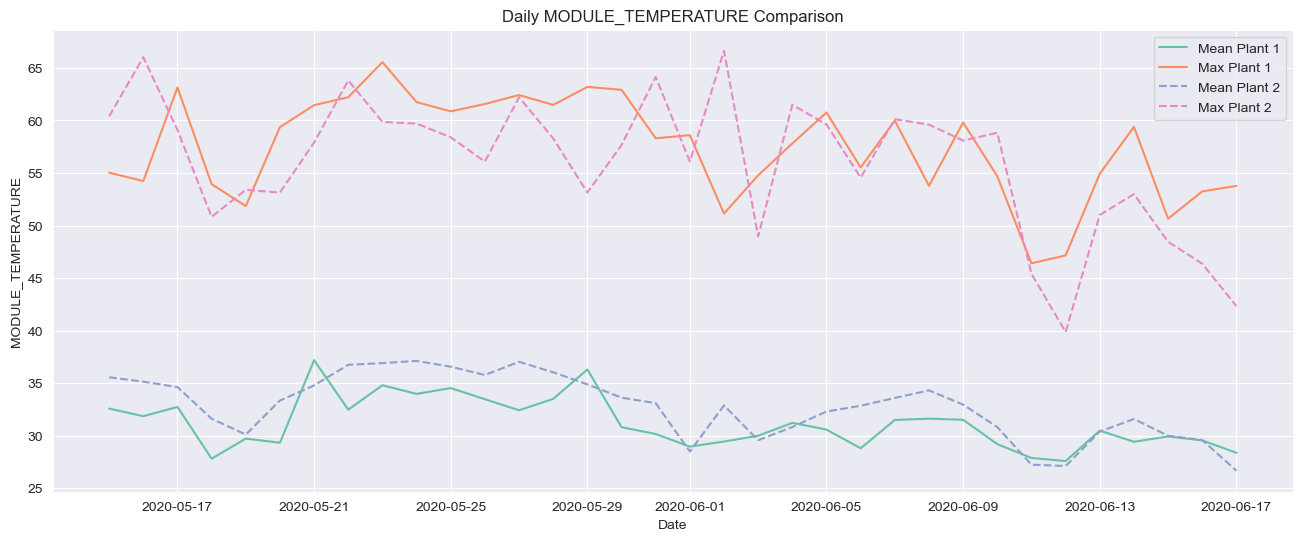

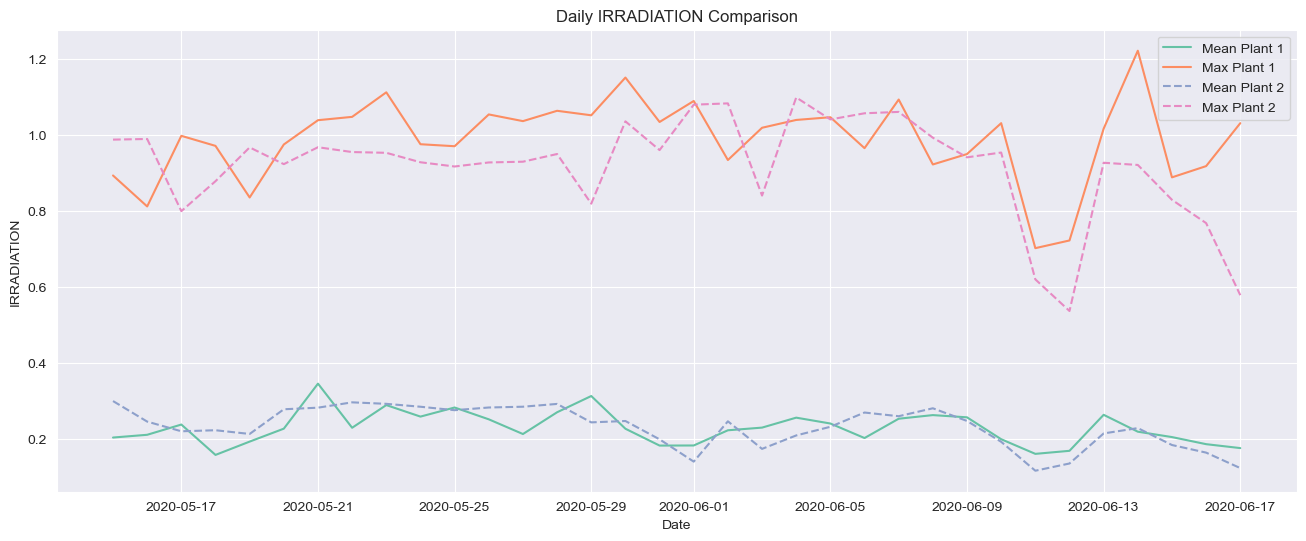

In [17]:
from sklearn.naive_bayes import GaussianNB
import numpy as np
import pandas as pd

def groupDailyWeather(df_weather, operation):
    # Convert DATE_TIME to datetime if not already
    df_weather['DATE_TIME'] = pd.to_datetime(df_weather['DATE_TIME'])
    
    # Extract date from DATE_TIME
    df_weather['DATE'] = df_weather['DATE_TIME'].dt.date
    
    # Perform the specified aggregation operation
    if operation == 'mean':
        df_sorted = df_weather.groupby('DATE').mean(numeric_only=True)
    elif operation == 'max':
        df_sorted = df_weather.groupby('DATE').max(numeric_only=True)
    else:
        raise ValueError("Invalid operation. Use 'mean' or 'max'.")
    
    df_sorted = df_sorted.sort_index()
    return df_sorted

def showDailyWeather(weather1, weather2, feature, label1, label2):
    df_sort1_mean = groupDailyWeather(weather1, 'mean')
    df_sort1_max = groupDailyWeather(weather1, 'max')
    df_sort2_mean = groupDailyWeather(weather2, 'mean')
    df_sort2_max = groupDailyWeather(weather2, 'max')
    
    plt.figure(figsize=(16, 6))
    plt.title(f'Daily {feature} Comparison')
    
    sns.lineplot(x=df_sort1_mean.index, y=df_sort1_mean[feature], label=f'Mean {label1}')
    sns.lineplot(x=df_sort1_max.index, y=df_sort1_max[feature], label=f'Max {label1}')
    sns.lineplot(x=df_sort2_mean.index, y=df_sort2_mean[feature], label=f'Mean {label2}', linestyle='dashed')
    sns.lineplot(x=df_sort2_max.index, y=df_sort2_max[feature], label=f'Max {label2}', linestyle='dashed')
    
    plt.xlabel('Date')
    plt.ylabel(feature)
    plt.legend()
    plt.show()

# Visualizing weather data
showDailyWeather(df_weather1, df_weather2, 'AMBIENT_TEMPERATURE', 'Plant 1', 'Plant 2')
showDailyWeather(df_weather1, df_weather2, 'MODULE_TEMPERATURE', 'Plant 1', 'Plant 2')
showDailyWeather(df_weather1, df_weather2, 'IRRADIATION', 'Plant 1', 'Plant 2')

def prepareData(df_sort, feature):
    n_bins = 12
    bins = np.linspace(df_sort[feature].min(), df_sort[feature].max(), n_bins)
    binned = np.digitize(df_sort[feature], bins)
    binned_series = pd.Series(binned, index=df_sort[feature].index)
    
    bin_means = {}
    for binn in range(1, n_bins+1):
        bin_means[binn] = df_sort['AC_POWER'][binned == binn].mean()
        
    lagged_list = []
    for s in range(13):
        lagged_list.append(binned_series.shift(s))
    
    lagged_frame = pd.concat(lagged_list, axis=1).dropna()
    
    train_X = lagged_frame.iloc[:, 1:]
    train_y = lagged_frame.iloc[:, 0]
    
    return train_X, train_y, bin_means

In [18]:
# Generation 1
df_sort1 = groupDailyPower(df_generation1)
train_X1, train_y1, bin_means1 = prepareData(df_sort1, 'AC_POWER')

# Generation 2
df_sort2 = groupDailyPower(df_generation2)
train_X2, train_y2, bin_means2 = prepareData(df_sort2, 'AC_POWER')

In [19]:
# Generation 1
model1 = GaussianNB()
model1.fit(train_X1, train_y1)

# Generation 2
model2 = GaussianNB()
model2.fit(train_X2, train_y2)

GaussianNB()

### prediction

In [20]:
def meanFromClass(bin_means, prediction):
    return(bin_means[prediction[0]])

def newPredict(last_y, last_x):
    last = last_y.astype(float)
    new_input = np.concatenate((last, last_x))[:12]
    return new_input

def newIndexDate(days, train_y):
    return pd.date_range(start=train_y.index[0].date(), end=train_y.index[-1].date() + dt.timedelta(days=days))

In [21]:
def prediction(train_X, train_y, model, bin_means, df_sort):
    num_next_days = 12
    pred_insample = model.predict(train_X)

    last = np.array([pred_insample[-1].astype(float)])
    last_X = np.array(train_X)[-1]
    new_input = np.concatenate((last, last_X))[:12]

    result_predict = []
    for i in range(num_next_days):
        result = model1.predict(new_input.reshape(1, -1))
        result_predict.append(result[0])
        new_input = newPredict(result, new_input)

    pred_insample = np.concatenate((pred_insample, np.array(result_predict)))
    new_index = newIndexDate(num_next_days, train_y)

    pred_insample = pd.DataFrame(pred_insample, index = new_index)
    resulting_prediction = pd.Series(np.nan, index = new_index)
    for row in range(len(pred_insample)):
        resulting_prediction.iloc[row] = meanFromClass(bin_means, pred_insample.values[row])

    plt.figure(figsize = (12,6))
    plt.plot(df_sort['AC_POWER'])
    plt.plot(resulting_prediction)

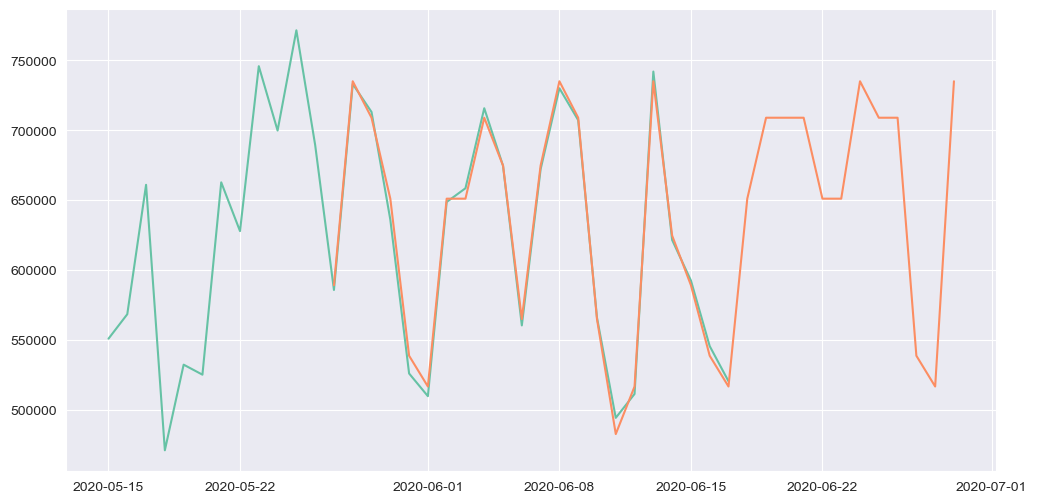

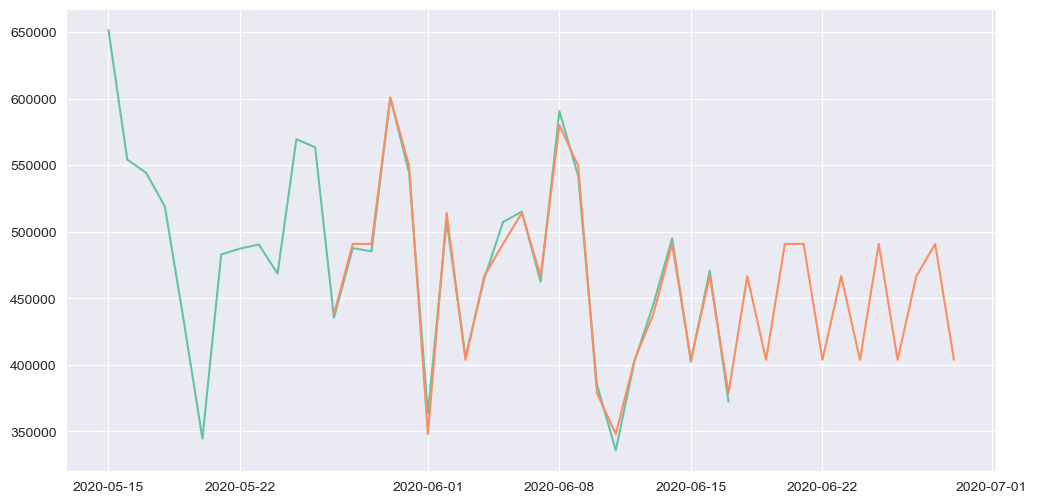

In [22]:
from sklearn.naive_bayes import GaussianNB
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

def groupDailyWeather(df_weather, operation):
    df_weather['DATE_TIME'] = pd.to_datetime(df_weather['DATE_TIME'])
    df_weather['DATE'] = df_weather['DATE_TIME'].dt.date
    
    if operation == 'mean':
        df_sorted = df_weather.groupby('DATE').mean(numeric_only=True)
    elif operation == 'max':
        df_sorted = df_weather.groupby('DATE').max(numeric_only=True)
    else:
        raise ValueError("Invalid operation. Use 'mean' or 'max'.")
    
    df_sorted = df_sorted.sort_index()
    return df_sorted

def showDailyWeather(weather1, weather2, feature, label1, label2):
    df_sort1_mean = groupDailyWeather(weather1, 'mean')
    df_sort1_max = groupDailyWeather(weather1, 'max')
    df_sort2_mean = groupDailyWeather(weather2, 'mean')
    df_sort2_max = groupDailyWeather(weather2, 'max')
    
    plt.figure(figsize=(16, 6))
    plt.title(f'Daily {feature} Comparison')
    
    sns.lineplot(x=df_sort1_mean.index, y=df_sort1_mean[feature], label=f'Mean {label1}')
    sns.lineplot(x=df_sort1_max.index, y=df_sort1_max[feature], label=f'Max {label1}')
    sns.lineplot(x=df_sort2_mean.index, y=df_sort2_mean[feature], label=f'Mean {label2}', linestyle='dashed')
    sns.lineplot(x=df_sort2_max.index, y=df_sort2_max[feature], label=f'Max {label2}', linestyle='dashed')
    
    plt.xlabel('Date')
    plt.ylabel(feature)
    plt.legend()
    plt.show()

def prepareData(df_sort, feature):
    n_bins = 12
    bins = np.linspace(df_sort[feature].min(), df_sort[feature].max(), n_bins)
    binned = np.digitize(df_sort[feature], bins)
    binned_series = pd.Series(binned, index=df_sort[feature].index)
    
    bin_means = {}
    for binn in range(1, n_bins+1):
        bin_means[binn] = df_sort['AC_POWER'][binned == binn].mean()
        
    lagged_list = []
    for s in range(13):
        lagged_list.append(binned_series.shift(s))
    
    lagged_frame = pd.concat(lagged_list, axis=1).dropna()
    
    train_X = lagged_frame.iloc[:, 1:]
    train_y = lagged_frame.iloc[:, 0]
    
    return train_X, train_y, bin_means

def meanFromClass(bin_means, prediction):
    return bin_means[prediction[0]]

def newPredict(last_y, last_x):
    last = last_y.astype(float)
    new_input = np.concatenate((last, last_x))[:12]
    return new_input

def newIndexDate(days, train_y):
    return pd.date_range(start=pd.Timestamp(train_y.index[0]), end=pd.Timestamp(train_y.index[-1]) + dt.timedelta(days=days))

def prediction(train_X, train_y, model, bin_means, df_sort):
    num_next_days = 12
    pred_insample = model.predict(train_X)
    
    last = np.array([pred_insample[-1].astype(float)])
    last_X = np.array(train_X)[-1]
    new_input = np.concatenate((last, last_X))[:12]
    
    result_predict = []
    for i in range(num_next_days):
        result = model.predict(new_input.reshape(1, -1))
        result_predict.append(result[0])
        new_input = newPredict(result, new_input)
    
    pred_insample = np.concatenate((pred_insample, np.array(result_predict)))
    new_index = newIndexDate(num_next_days, train_y)
    
    pred_insample = pd.DataFrame(pred_insample, index=new_index)
    resulting_prediction = pd.Series(np.nan, index=new_index)
    for row in range(len(pred_insample)):
        resulting_prediction.iloc[row] = meanFromClass(bin_means, pred_insample.values[row])
    
    plt.figure(figsize=(12, 6))
    plt.plot(df_sort['AC_POWER'])
    plt.plot(resulting_prediction)
    plt.show()

# Generation 1
df_sort1 = groupDailyPower(df_generation1)
train_X1, train_y1, bin_means1 = prepareData(df_sort1, 'AC_POWER')
prediction(train_X1, train_y1, model1, bin_means1, df_sort1)

# Generation 2
df_sort2 = groupDailyPower(df_generation2)
train_X2, train_y2, bin_means2 = prepareData(df_sort2, 'AC_POWER')
prediction(train_X2, train_y2, model2, bin_means2, df_sort2)


In [23]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Plant 1 Evaluation
y_pred1 = model1.predict(train_X1)
print("Plant 1 Accuracy:", accuracy_score(train_y1, y_pred1))
print("Plant 1 Confusion Matrix:\n", confusion_matrix(train_y1, y_pred1))
print("Plant 1 Classification Report:\n", classification_report(train_y1, y_pred1))

# Plant 2 Evaluation
y_pred2 = model2.predict(train_X2)
print("Plant 2 Accuracy:", accuracy_score(train_y2, y_pred2))
print("Plant 2 Confusion Matrix:\n", confusion_matrix(train_y2, y_pred2))
print("Plant 2 Classification Report:\n", classification_report(train_y2, y_pred2))



Plant 1 Accuracy: 1.0
Plant 1 Confusion Matrix:
 [[1 0 0 0 0 0 0 0 0 0]
 [0 3 0 0 0 0 0 0 0 0]
 [0 0 2 0 0 0 0 0 0 0]
 [0 0 0 2 0 0 0 0 0 0]
 [0 0 0 0 2 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0]
 [0 0 0 0 0 0 3 0 0 0]
 [0 0 0 0 0 0 0 2 0 0]
 [0 0 0 0 0 0 0 0 3 0]
 [0 0 0 0 0 0 0 0 0 3]]
Plant 1 Classification Report:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00         1
           2       1.00      1.00      1.00         3
           3       1.00      1.00      1.00         2
           4       1.00      1.00      1.00         2
           5       1.00      1.00      1.00         2
           6       1.00      1.00      1.00         1
           7       1.00      1.00      1.00         3
           8       1.00      1.00      1.00         2
           9       1.00      1.00      1.00         3
          10       1.00      1.00      1.00         3

    accuracy                           1.00        22
   macro avg       1.00      1.00     